In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_excel("../Data/Raw/cattle.xlsx")

In [9]:
correlations = df.corr()["ActualBodyWeight"].sort_values(ascending=False)

print("Correlations with ActualBodyWeight:")
print(correlations)

Correlations with ActualBodyWeight:
ActualBodyWeight        1.000000
HeartGirth              0.859868
AbdGirth                0.851238
ChestDepth              0.651687
Scapuloischiallength    0.563804
WHHeightAtWither        0.524599
Rumpheight              0.516874
BLBodylengthcm          0.477655
RumpWidth               0.439753
HockBoneDiameter        0.410467
RumpLength              0.368583
CannonBoneDiameter      0.336118
SternumHeight          -0.015735
AnimalNo               -0.054934
Name: ActualBodyWeight, dtype: float64


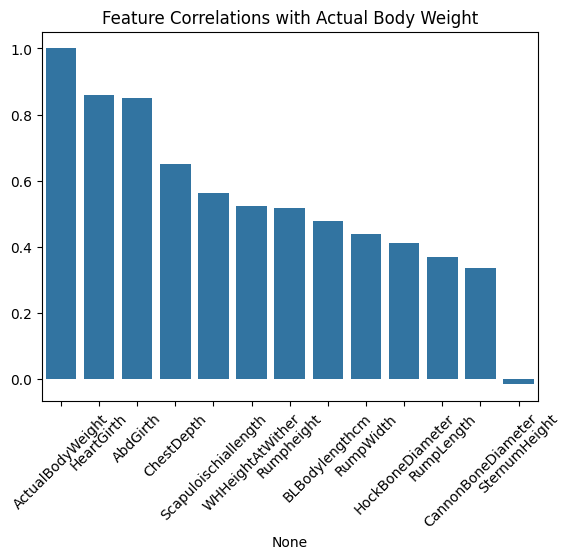

In [10]:
sns.barplot(x=correlations.index[:-1], y=correlations.values[:-1])
plt.xticks(rotation=45)
plt.title("Feature Correlations with Actual Body Weight")
plt.show()

In [14]:
# Update your feature set based on correlation analysis
selected_features = [
    "HeartGirth", "AbdGirth", "ChestDepth", "Scapuloischiallength",
    "WHHeightAtWither", "Rumpheight", "BLBodylengthcm", "RumpWidth",
    "HockBoneDiameter", "RumpLength"
]

X = df[selected_features]
y = df["ActualBodyWeight"]

# Proceed with preprocessing and model building as before


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models, callbacks

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # output layer for regression
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

c:\Users\gauta\OneDrive\Dokumentai\cattle_model\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [20]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 366402.8438 - mae: 600.6954 - val_loss: 379876.0938 - val_mae: 611.0637
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 364584.9062 - mae: 599.2001 - val_loss: 377434.1875 - val_mae: 609.1299
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 361785.4375 - mae: 596.8785 - val_loss: 373546.0625 - val_mae: 606.0303
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 357232.2812 - mae: 593.0803 - val_loss: 367153.1250 - val_mae: 600.9030
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 350006.7812 - mae: 586.9838 - val_loss: 356893.2500 - val_mae: 592.5822
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 338726.9062 - mae: 577.3802 - val_loss: 341723.5938 - val_mae: 580.0099
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 322510.9688 - mae: 563.1832 - val_loss: 320348.7500 - val_mae: 561.7161
Epoch 8/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 300471.3125 - mae:

In [21]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {mae:.2f}")
print(f"Test MSE: {loss:.2f}")

Test MAE: 27.34
Test MSE: 1292.82


In [22]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # output layer for regression
])

In [28]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True
)

In [29]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4894.2373 - mae: 56.6384 - val_loss: 1353.0968 - val_mae: 30.1840
Epoch 2/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4878.7651 - mae: 55.7457 - val_loss: 746.8669 - val_mae: 20.5832
Epoch 3/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5341.6445 - mae: 58.5378 - val_loss: 1176.1346 - val_mae: 26.5770
Epoch 4/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4554.4985 - mae: 53.9117 - val_loss: 1220.9138 - val_mae: 27.8620
Epoch 5/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5607.9668 - mae: 59.9222 - val_loss: 904.8623 - val_mae: 22.3210
Epoch 6/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5222.9233 - mae: 56.4919 - val_loss: 941.5368 - val_mae: 23.6597
Epoch 7/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4725.7036 - mae: 53.9452 - val_loss: 1008.8417 - val_mae: 22.9581
Epoch 8/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5711.9980 - mae: 60.3026 - val_loss: 1421.3041 - val_mae: 30.3687
Epo

In [30]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {mae:.2f}")
print(f"Test MSE: {loss:.2f}")

Test MAE: 25.98
Test MSE: 1169.58


In [34]:
from tensorflow.keras.optimizers import Adam

batch_sizes = [8, 16, 32]
best_lr = 0.001  # Set this to your best learning rate from previous step

for bs in batch_sizes:
    print(f"Training model with batch size: {bs}")
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(
        optimizer=Adam(learning_rate=best_lr),
        loss='mse',
        metrics=['mae']
    )
    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=300,
        batch_size=bs,
        callbacks=[early_stop],
        verbose=0
    )
    loss, mae = model.evaluate(X_test, y_test, verbose=0)
    print(f"Batch size: {bs} - Test MAE: {mae:.2f}, MSE: {loss:.2f}\n")


Training model with batch size: 8
Batch size: 8 - Test MAE: 26.43, MSE: 1185.92

Training model with batch size: 16
Batch size: 16 - Test MAE: 26.64, MSE: 1142.84

Training model with batch size: 32
Batch size: 32 - Test MAE: 28.75, MSE: 1383.88



In [35]:
from sklearn.model_selection import KFold
import numpy as np
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.optimizers import Adam

# Prepare data arrays
X_array = X.values
y_array = y.values

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []
mse_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X_array)):
    print(f"Training fold {fold+1}...")
    X_train_fold, X_val_fold = X_array[train_index], X_array[val_index]
    y_train_fold, y_val_fold = y_array[train_index], y_array[val_index]

    # Standardize features per fold
    scaler = StandardScaler()
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_val_fold = scaler.transform(X_val_fold)

    # Build model
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train_fold.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )

    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

    model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=300,
        batch_size=16,
        callbacks=[early_stop],
        verbose=0
    )

    loss, mae = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f"Fold {fold+1} - MAE: {mae:.2f}, MSE: {loss:.2f}")
    mae_scores.append(mae)
    mse_scores.append(loss)

print(f"\nAverage MAE: {np.mean(mae_scores):.2f} +/- {np.std(mae_scores):.2f}")
print(f"Average MSE: {np.mean(mse_scores):.2f} +/- {np.std(mse_scores):.2f}")


Training fold 1...


c:\Users\gauta\OneDrive\Dokumentai\cattle_model\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 - MAE: 24.86, MSE: 1051.17
Training fold 2...


c:\Users\gauta\OneDrive\Dokumentai\cattle_model\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 2 - MAE: 26.91, MSE: 1049.37
Training fold 3...


c:\Users\gauta\OneDrive\Dokumentai\cattle_model\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 3 - MAE: 26.63, MSE: 1017.17
Training fold 4...


c:\Users\gauta\OneDrive\Dokumentai\cattle_model\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 4 - MAE: 24.68, MSE: 910.67
Training fold 5...


c:\Users\gauta\OneDrive\Dokumentai\cattle_model\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 5 - MAE: 19.54, MSE: 636.26

Average MAE: 24.52 +/- 2.65
Average MSE: 932.93 +/- 156.93


In [36]:
from sklearn.metrics import r2_score

r2_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X_array)):
    print(f"Training fold {fold+1}...")
    X_train_fold, X_val_fold = X_array[train_index], X_array[val_index]
    y_train_fold, y_val_fold = y_array[train_index], y_array[val_index]

    scaler = StandardScaler()
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_val_fold = scaler.transform(X_val_fold)

    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train_fold.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )

    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

    model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=300,
        batch_size=16,
        callbacks=[early_stop],
        verbose=0
    )

    predictions = model.predict(X_val_fold).flatten()
    r2 = r2_score(y_val_fold, predictions)
    print(f"Fold {fold+1} - R-squared: {r2:.4f}")
    r2_scores.append(r2)

print(f"\nAverage R-squared: {np.mean(r2_scores):.4f} +/- {np.std(r2_scores):.4f}")


Training fold 1...


c:\Users\gauta\OneDrive\Dokumentai\cattle_model\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Fold 1 - R-squared: 0.8512
Training fold 2...


c:\Users\gauta\OneDrive\Dokumentai\cattle_model\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Fold 2 - R-squared: 0.8470
Training fold 3...


c:\Users\gauta\OneDrive\Dokumentai\cattle_model\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002414B67AFC0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Fold 3 - R-squared: 0.7569
Training fold 4...


c:\Users\gauta\OneDrive\Dokumentai\cattle_model\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Fold 4 - R-squared: 0.8044
Training fold 5...


c:\Users\gauta\OneDrive\Dokumentai\cattle_model\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Fold 5 - R-squared: 0.9100

Average R-squared: 0.8339 +/- 0.0511


In [38]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error
import numpy as np

# Prepare data
X_array = X.values
y_array = y.values

# Define XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Custom scorer for R2
r2_scorer = make_scorer(r2_score)

# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(xgb_model, X_array, y_array, scoring=r2_scorer, cv=kf)

print(f"XGBoost 5-Fold CV R2 scores: {r2_scores}")
print(f"Average R2: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")


XGBoost 5-Fold CV R2 scores: [0.81766719 0.78682321 0.7231366  0.72040451 0.86223674]
Average R2: 0.7821 ± 0.0548


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, r2_score
import numpy as np

# Prepare data
X_array = X.values
y_array = y.values

# Define Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Custom scorer for R2
r2_scorer = make_scorer(r2_score)

# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(rf_model, X_array, y_array, scoring=r2_scorer, cv=kf)

print(f"Random Forest 5-Fold CV R2 scores: {r2_scores}")
print(f"Average R2: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")


Random Forest 5-Fold CV R2 scores: [0.84254042 0.84382278 0.75759671 0.77874787 0.88462074]
Average R2: 0.8215 ± 0.0466


In [40]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)

# Check new shape
print(f"Original features: {X.shape[1]}")
print(f"Polynomial features after transformation: {X_poly.shape[1]}")

# Proceed with splitting, scaling, and training as before, but using X_poly


Original features: 10
Polynomial features after transformation: 65


In [42]:
# Use X_poly for features and y as target
X = pd.DataFrame(X_poly)  # Convert to DataFrame if needed

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models, callbacks

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build model (same architecture as before or feel free to tweak)
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam', 
    loss='mse', 
    metrics=['mae']
)

early_stop = callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=30, 
    restore_best_weights=True
)

# Train model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {mae:.2f}")
print(f"Test MSE: {loss:.2f}")

# Predict on test set
y_pred = model.predict(X_test).flatten()

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"Test R-squared: {r2:.4f}")


Epoch 1/300


c:\Users\gauta\OneDrive\Dokumentai\cattle_model\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 365005.7188 - mae: 599.5800 - val_loss: 374959.0938 - val_mae: 607.2308
Epoch 2/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 352152.3125 - mae: 588.7757 - val_loss: 344078.3125 - val_mae: 582.2297
Epoch 3/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 297762.4688 - mae: 538.7284 - val_loss: 231608.8438 - val_mae: 471.7243
Epoch 4/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 174296.9219 - mae: 384.4925 - val_loss: 120042.5781 - val_mae: 303.3246
Epoch 5/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 127020.9453 - mae: 311.5905 - val_loss: 110711.3984 - val_mae: 292.9860
Epoch 6/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 115045.2344 - mae: 294.9956 - val_loss: 102951.1328 - val_mae: 285.0571
Epoch 7/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 102262.7656 - mae: 279.4567 - val_loss: 92533.3828 - val_mae: 272.2722
Epoch 8/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 90895.1406 - mae: 258.7139 - val_loss

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Fit Random Forest on polynomial features
rf_selector = RandomForestRegressor(n_estimators=100, random_state=42)
rf_selector.fit(X, y)

# Select features with importance above the mean importance
selector = SelectFromModel(rf_selector, threshold='mean', prefit=True)
X_selected = selector.transform(X)

print(f"Original feature count: {X.shape[1]}")
print(f"Selected feature count: {X_selected.shape}")

# Now X_selected has the reduced set of important features
# Proceed with train-test split, scaling, and neural network training using X_selected

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Original feature count: 65
Selected feature count: (517, 4)


In [44]:
# X_selected is your features after selection, shape (n_samples, 4)

from tensorflow.keras import layers, models, callbacks
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split the selected features
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build model (simple architecture)
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True
)

# Train model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {mae:.2f}")
print(f"Test MSE: {loss:.2f}")

# Predict and calculate R2
y_pred = model.predict(X_test).flatten()
r2 = r2_score(y_test, y_pred)
print(f"Test R-squared: {r2:.4f}")


Epoch 1/300


c:\Users\gauta\OneDrive\Dokumentai\cattle_model\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 366687.3750 - mae: 600.9410 - val_loss: 380386.0625 - val_mae: 611.4863
Epoch 2/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 365590.5625 - mae: 600.0330 - val_loss: 378797.4062 - val_mae: 610.2303
Epoch 3/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 363753.5625 - mae: 598.5067 - val_loss: 375947.7812 - val_mae: 607.9678
Epoch 4/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 360592.4375 - mae: 595.8808 - val_loss: 370887.0938 - val_mae: 603.9376
Epoch 5/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 354855.2812 - mae: 591.0599 - val_loss: 362799.2812 - val_mae: 597.4111
Epoch 6/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 346322.1875 - mae: 583.7698 - val_loss: 350877.2188 - val_mae: 587.5955
Epoch 7/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 334205.8438 - mae: 573.2090 - val_loss: 333776.9062 - val_mae: 573.1552
Epoch 8/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 316914.9688 - mae: 557.8077 - val_lo

In [45]:
from tensorflow.keras.optimizers import Adam

learning_rates = [0.001, 0.0005]
dropout_rates = [0.3, 0.5]
best_r2 = -float('inf')
best_params = {}

for lr in learning_rates:
    for dr in dropout_rates:
        print(f"Training with learning rate={lr}, dropout={dr}")
        model = models.Sequential([
            layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
            layers.Dropout(dr),
            layers.Dense(32, activation='relu'),
            layers.Dense(1)
        ])
        model.compile(optimizer=Adam(lr), loss='mse', metrics=['mae'])

        early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

        history = model.fit(
            X_train, y_train,
            validation_split=0.2,
            epochs=300,
            batch_size=16,
            callbacks=[early_stop],
            verbose=0
        )

        y_pred = model.predict(X_test).flatten()
        r2 = r2_score(y_test, y_pred)
        print(f"R-squared: {r2:.4f}\n")

        if r2 > best_r2:
            best_r2 = r2
            best_params = {'learning_rate': lr, 'dropout': dr}

print(f"Best R-squared: {best_r2:.4f} with params: {best_params}")


Training with learning rate=0.001, dropout=0.3


c:\Users\gauta\OneDrive\Dokumentai\cattle_model\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R-squared: 0.8633

Training with learning rate=0.001, dropout=0.5


c:\Users\gauta\OneDrive\Dokumentai\cattle_model\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R-squared: 0.8687

Training with learning rate=0.0005, dropout=0.3


c:\Users\gauta\OneDrive\Dokumentai\cattle_model\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R-squared: 0.8477

Training with learning rate=0.0005, dropout=0.5


c:\Users\gauta\OneDrive\Dokumentai\cattle_model\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R-squared: 0.8666

Best R-squared: 0.8687 with params: {'learning_rate': 0.001, 'dropout': 0.5}
